# Model Evaluation - Flowers Recognition
## Introduction
This notebook focuses on **comprehensive model evaluation** for the flowers recognition project. We will evaluate our trained models on the test set and understand how well they perform in practice.

**Dataset:** Flowers Recognition (Kaggle)

**Objective:** Explore and visualize the dataset to gain insights and guide further analysis

**Author:** NGUYEN Ngoc Dang Nguyen - Final-year Student in Computer Science, Aix-Marseille University

**Evaluation steps:**
1. Load trained models and test data
2. Test set evaluation
3. Performance analysis and visualization
4. Error analysis
5. Final recommendations

## 1. Setup and Data Loading

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from datetime import datetime

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configuration
plt.style.use('default')
sns.set_palette("husl")

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {len(tf.config.list_physical_devices('GPU')) > 0}")

# Paths
PROCESSED_PATH = r"C:\Users\nndng\OneDrive\Desktop\flowers-recognition\data\processed"
MODELS_PATH = r"C:\Users\nndng\OneDrive\Desktop\flowers-recognition\models"
RESULTS_PATH = r"C:\Users\nndng\OneDrive\Desktop\flowers-recognition\results"
EVALUATION_PATH = r"C:\Users\nndng\OneDrive\Desktop\flowers-recognition\evaluation"

# Create evaluation directory
os.makedirs(EVALUATION_PATH, exist_ok=True)

print("Setup completed!")

# 1.1 Load Test Data
# Load test data using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(PROCESSED_PATH, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for evaluation
)

class_names = list(test_generator.class_indices.keys())
num_classes = len(class_names)

print(f"Test data loaded successfully!")
print(f"Test samples: {test_generator.samples}")
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

# 1.2 Load Trained Models
def load_model_if_exists(model_path, model_name):
    """Load model if it exists"""
    if os.path.exists(model_path):
        print(f"Loading {model_name}...")
        return keras.models.load_model(model_path)
    else:
        print(f"Warning: {model_name} not found!")
        return None

# Load available models
models = {}
model_files = [
    ('Transfer_ResNet50_best.h5', 'Transfer ResNet50'),
    ('Transfer_ResNet50_FineTuned_best.h5', 'Fine-tuned ResNet50'),
    ('Improved_CNN_best.h5', 'Improved CNN')
 ]

for file_name, model_name in model_files:
    model_path = os.path.join(MODELS_PATH, file_name)
    model = load_model_if_exists(model_path, model_name)
    if model is not None:
        models[model_name] = model

print(f"\nLoaded {len(models)} models successfully!")

TensorFlow version: 2.20.0
GPU available: False
Setup completed!
Found 432 images belonging to 5 classes.
Test data loaded successfully!
Test samples: 432
Number of classes: 5
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Loading Transfer ResNet50...
Test data loaded successfully!
Test samples: 432
Number of classes: 5
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Loading Transfer ResNet50...


Loading Fine-tuned ResNet50...


Loading Improved CNN...



Loaded 3 models successfully!


## 2. Test Set Evaluation

c:\Users\nndng\OneDrive\Desktop\flowers-recognition\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Evaluating Transfer ResNet50
------------------------------


Test Loss: 1.1129
Test Accuracy: 0.5556

Evaluating Fine-tuned ResNet50
------------------------------
Test Loss: 1.0330
Test Accuracy: 0.6157

Evaluating Improved CNN
------------------------------
Test Loss: 1.0330
Test Accuracy: 0.6157

Evaluating Improved CNN
------------------------------
Test Loss: 2.4473
Test Accuracy: 0.3981

MODEL COMPARISON ON TEST SET
              Model Test Accuracy Test Loss
  Transfer ResNet50        0.5556    1.1129
Fine-tuned ResNet50        0.6157    1.0330
       Improved CNN        0.3981    2.4473
Test Loss: 2.4473
Test Accuracy: 0.3981

MODEL COMPARISON ON TEST SET
              Model Test Accuracy Test Loss
  Transfer ResNet50        0.5556    1.1129
Fine-tuned ResNet50        0.6157    1.0330
       Improved CNN        0.3981    2.4473


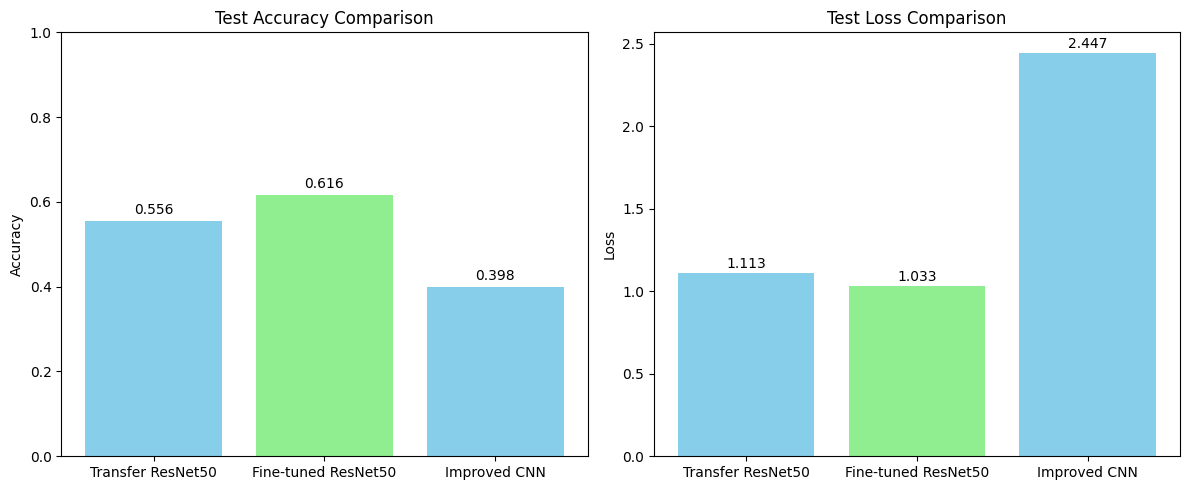

In [19]:
# 2.1 Basic Evaluation
def evaluate_model(model, test_gen, model_name):
    """Evaluate a model on test set"""
    print(f"\nEvaluating {model_name}")
    print("-" * 30)
    
    # Reset generator
    test_gen.reset()
    
    # Get basic metrics
    metrics = model.evaluate(test_gen, verbose=0)
    test_loss = metrics[0]
    test_accuracy = metrics[1]
    
    # Get predictions
    predictions = model.predict(test_gen, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # True classes
    true_classes = test_gen.classes
    
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    return {
        'model_name': model_name,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'predictions': predicted_classes,
        'true_labels': true_classes,
        'prediction_probabilities': predictions
    }

# Evaluate all models
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, test_generator, model_name)

# 2.2 Model Comparison
# Create comparison table
comparison_data = []
for model_name, result in results.items():
    comparison_data.append({
        'Model': model_name,
        'Test Accuracy': f"{result['test_accuracy']:.4f}",
        'Test Loss': f"{result['test_loss']:.4f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nMODEL COMPARISON ON TEST SET")
print("=" * 40)
print(comparison_df.to_string(index=False))

# Save comparison
comparison_df.to_csv(f'{EVALUATION_PATH}/test_comparison.csv', index=False)

# 2.3 Visualize Performance
# Performance comparison chart
model_names = list(results.keys())
accuracies = [results[name]['test_accuracy'] for name in model_names]
losses = [results[name]['test_loss'] for name in model_names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison
bars1 = ax1.bar(model_names, accuracies, color=['skyblue', 'lightgreen'])
ax1.set_title('Test Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01, 
             f'{accuracies[i]:.3f}', ha='center', va='bottom')

# Loss comparison
bars2 = ax2.bar(model_names, losses, color=['skyblue', 'lightgreen'])
ax2.set_title('Test Loss Comparison')
ax2.set_ylabel('Loss')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01, 
             f'{losses[i]:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(f'{EVALUATION_PATH}/performance_comparison.png')
plt.show()

## 3. Detailed Analysis

BEST MODEL: Fine-tuned ResNet50
Test Accuracy: 0.6157
Test Loss: 1.0330


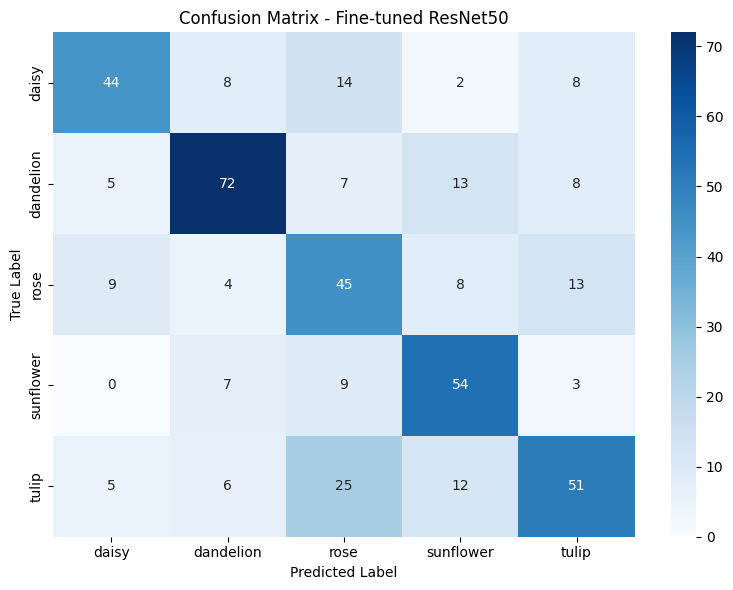


Classification Report - Fine-tuned ResNet50
              precision    recall  f1-score   support

       daisy       0.70      0.58      0.63        76
   dandelion       0.74      0.69      0.71       105
        rose       0.45      0.57      0.50        79
   sunflower       0.61      0.74      0.67        73
       tulip       0.61      0.52      0.56        99

    accuracy                           0.62       432
   macro avg       0.62      0.62      0.62       432
weighted avg       0.63      0.62      0.62       432

daisy: 0.5789 (76 samples)
dandelion: 0.6857 (105 samples)
rose: 0.5696 (79 samples)
sunflower: 0.7397 (73 samples)
tulip: 0.5152 (99 samples)


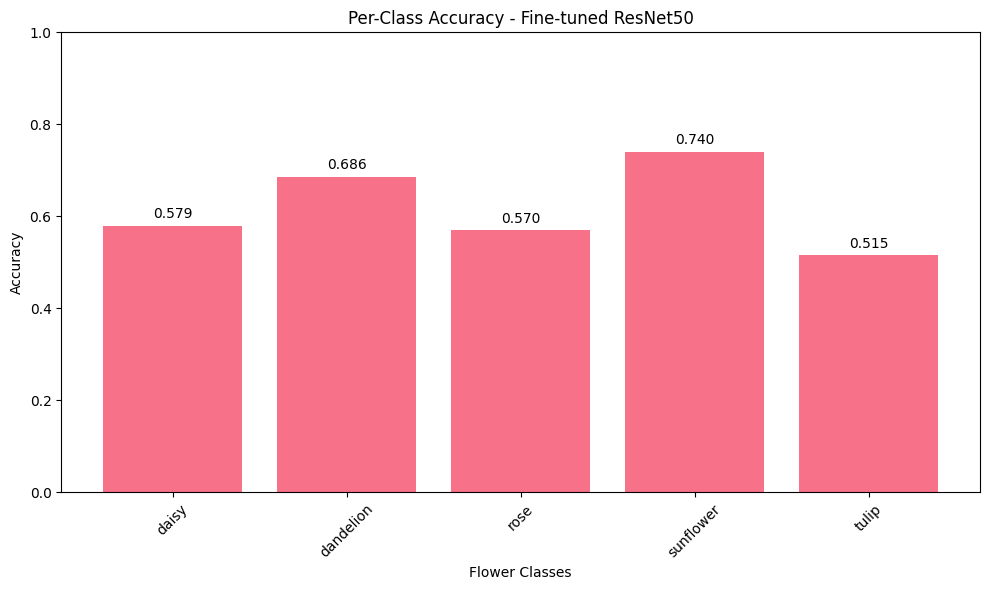

In [20]:
# 3.1 Select Best Model
# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
best_result = results[best_model_name]

print(f"BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {best_result['test_accuracy']:.4f}")
print(f"Test Loss: {best_result['test_loss']:.4f}")

# 3.2 Confusion Matrix
def plot_confusion_matrix(true_labels, predicted_labels, class_names, model_name):
    """Plot confusion matrix"""
    cm = confusion_matrix(true_labels, predicted_labels)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'{EVALUATION_PATH}/{model_name}_confusion_matrix.png')
    plt.show()
    
    return cm

# Plot confusion matrix for best model
cm = plot_confusion_matrix(
    best_result['true_labels'], 
    best_result['predictions'], 
    class_names, 
    best_model_name
)

# 3.3 Classification Report
# Detailed classification report
print(f"\nClassification Report - {best_model_name}")
print("=" * 50)
report = classification_report(
    best_result['true_labels'], 
    best_result['predictions'], 
    target_names=class_names
)
print(report)

# Save report
with open(f'{EVALUATION_PATH}/classification_report.txt', 'w') as f:
    f.write(f"Classification Report - {best_model_name}\n")
    f.write("=" * 50 + "\n")
    f.write(report)

# 3.4 Per-Class Performance
# Per-class accuracy
per_class_accuracy = []
for i, class_name in enumerate(class_names):
    class_mask = (best_result['true_labels'] == i)
    if np.any(class_mask):
        class_acc = np.mean(best_result['predictions'][class_mask] == i)
        per_class_accuracy.append(class_acc)
        print(f"{class_name}: {class_acc:.4f} ({np.sum(class_mask)} samples)")
    else:
        per_class_accuracy.append(0)

# Visualize per-class performance
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, per_class_accuracy)
plt.title(f'Per-Class Accuracy - {best_model_name}')
plt.xlabel('Flower Classes')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, 
             f'{per_class_accuracy[i]:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(f'{EVALUATION_PATH}/per_class_accuracy.png')
plt.show()

## 4. Error Analysis

PREDICTION CONFIDENCE ANALYSIS
Correct predictions: 266
  Average confidence: 0.6279
Incorrect predictions: 166
  Average confidence: 0.4872


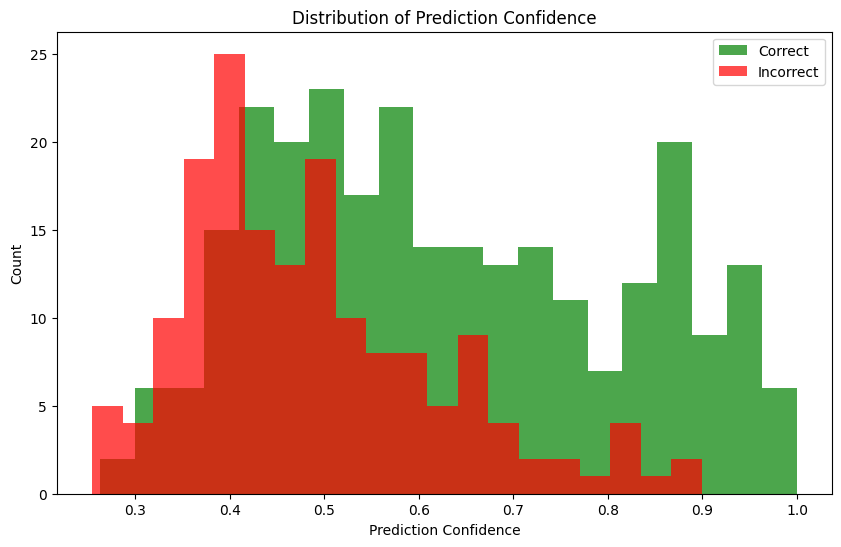

MOST CONFUSED CLASS PAIRS
1. tulip → rose: 25 times
2. daisy → rose: 14 times
3. dandelion → sunflower: 13 times


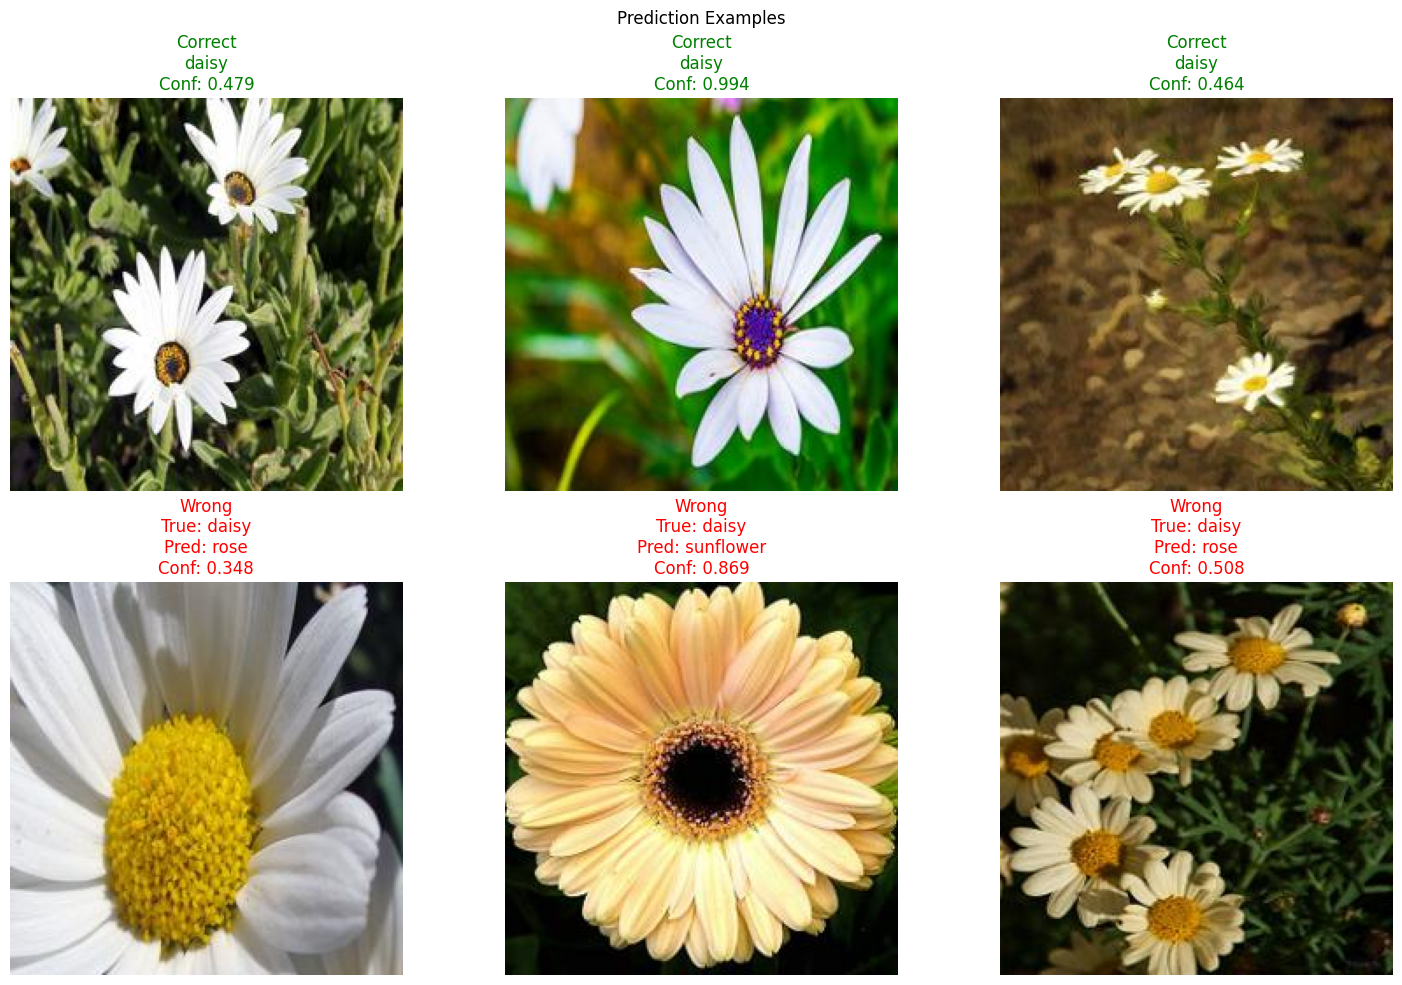

In [21]:
# 4.1 Prediction Confidence
def analyze_predictions(result, class_names):
    """Analyze prediction confidence"""
    predictions = result['prediction_probabilities']
    true_labels = result['true_labels']
    predicted_labels = result['predictions']
    
    # Calculate confidence (max probability)
    confidences = np.max(predictions, axis=1)
    
    # Separate correct and incorrect predictions
    correct_mask = (true_labels == predicted_labels)
    
    correct_conf = confidences[correct_mask]
    incorrect_conf = confidences[~correct_mask]
    
    print("PREDICTION CONFIDENCE ANALYSIS")
    print("=" * 35)
    print(f"Correct predictions: {len(correct_conf)}")
    print(f"  Average confidence: {np.mean(correct_conf):.4f}")
    
    print(f"Incorrect predictions: {len(incorrect_conf)}")
    if len(incorrect_conf) > 0:
        print(f"  Average confidence: {np.mean(incorrect_conf):.4f}")
    
    # Plot confidence distribution
    plt.figure(figsize=(10, 6))
    if len(incorrect_conf) > 0:
        plt.hist(correct_conf, bins=20, alpha=0.7, label='Correct', color='green')
        plt.hist(incorrect_conf, bins=20, alpha=0.7, label='Incorrect', color='red')
        plt.legend()
    else:
        plt.hist(correct_conf, bins=20, alpha=0.7, color='green')
    
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Count')
    plt.title('Distribution of Prediction Confidence')
    plt.savefig(f'{EVALUATION_PATH}/confidence_distribution.png')
    plt.show()

# Analyze predictions for best model
analyze_predictions(best_result, class_names)

# 4.2 Most Confused Classes
def find_confused_classes(cm, class_names, top_n=3):
    """Find most commonly confused class pairs"""
    print("MOST CONFUSED CLASS PAIRS")
    print("=" * 30)
    
    confusion_pairs = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if i != j and cm[i, j] > 0:
                confusion_pairs.append({
                    'true': class_names[i],
                    'predicted': class_names[j],
                    'count': cm[i, j]
                })
    
    # Sort by confusion count
    confusion_pairs.sort(key=lambda x: x['count'], reverse=True)
    
    for i, pair in enumerate(confusion_pairs[:top_n]):
        print(f"{i+1}. {pair['true']} → {pair['predicted']}: {pair['count']} times")

# Find confused classes
find_confused_classes(cm, class_names)

# 4.3 Sample Analysis
def show_prediction_examples(result, test_gen, class_names, n_examples=6):
    """Show examples of correct and incorrect predictions"""
    
    # Get some sample images and predictions
    test_gen.reset()
    sample_batch = next(test_gen)
    sample_images = sample_batch[0]
    sample_true = np.argmax(sample_batch[1], axis=1)
    
    # Get predictions for this batch
    sample_pred_probs = models[best_model_name].predict(sample_images, verbose=0)
    sample_pred = np.argmax(sample_pred_probs, axis=1)
    sample_conf = np.max(sample_pred_probs, axis=1)
    
    # Find correct and incorrect predictions
    correct_indices = np.where(sample_true == sample_pred)[0]
    incorrect_indices = np.where(sample_true != sample_pred)[0]
    
    # Show examples
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Correct predictions
    for i in range(min(3, len(correct_indices))):
        idx = correct_indices[i]
        axes[0, i].imshow(sample_images[idx])
        axes[0, i].set_title(f'Correct\n{class_names[sample_true[idx]]}\nConf: {sample_conf[idx]:.3f}', 
                           color='green')
        axes[0, i].axis('off')
    
    # Incorrect predictions
    for i in range(min(3, len(incorrect_indices))):
        idx = incorrect_indices[i]
        axes[1, i].imshow(sample_images[idx])
        axes[1, i].set_title(f'Wrong\nTrue: {class_names[sample_true[idx]]}\nPred: {class_names[sample_pred[idx]]}\nConf: {sample_conf[idx]:.3f}', 
                           color='red')
        axes[1, i].axis('off')
    
    # Hide empty subplots
    for i in range(3):
        if i >= len(correct_indices):
            axes[0, i].set_visible(False)
        if i >= len(incorrect_indices):
            axes[1, i].set_visible(False)
    
    plt.suptitle('Prediction Examples')
    plt.tight_layout()
    plt.savefig(f'{EVALUATION_PATH}/prediction_examples.png')
    plt.show()

# Show prediction examples
show_prediction_examples(best_result, test_generator, class_names)

## 5. Model Performance Summary

In [22]:
# 5.1 Performance Metrics Summary
def calculate_performance_metrics(result):
    """Calculate comprehensive performance metrics"""
    true_labels = result['true_labels']
    predicted_labels = result['predictions']
    
    # Overall accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Per-class metrics from sklearn
    report_dict = classification_report(
        true_labels, predicted_labels, 
        target_names=class_names, output_dict=True
    )
    
    return {
        'accuracy': accuracy,
        'macro_precision': report_dict['macro avg']['precision'],
        'macro_recall': report_dict['macro avg']['recall'],
        'macro_f1': report_dict['macro avg']['f1-score'],
        'weighted_f1': report_dict['weighted avg']['f1-score']
    }

# 5.2 Model Insights
# Calculate metrics for best model
metrics = calculate_performance_metrics(best_result)

print("PERFORMANCE SUMMARY")
print("=" * 25)
print(f"Model: {best_model_name}")
print(f"Test Accuracy: {metrics['accuracy']:.4f}")
print(f"Macro F1-Score: {metrics['macro_f1']:.4f}")
print(f"Weighted F1-Score: {metrics['weighted_f1']:.4f}")
print(f"Macro Precision: {metrics['macro_precision']:.4f}")
print(f"Macro Recall: {metrics['macro_recall']:.4f}")

# Calculate baseline performance
baseline_accuracy = 1.0 / num_classes
improvement = metrics['accuracy'] - baseline_accuracy

print("\nMODEL INSIGHTS")
print("=" * 20)
print(f"Random baseline accuracy: {baseline_accuracy:.4f} ({baseline_accuracy*100:.1f}%)")
print(f"Our model accuracy: {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.1f}%)")
print(f"Improvement over random: +{improvement:.4f} (+{improvement*100:.1f}%)")

# Best and worst performing classes
best_class_idx = np.argmax(per_class_accuracy)
worst_class_idx = np.argmin(per_class_accuracy)

print(f"\nBest performing class: {class_names[best_class_idx]} ({per_class_accuracy[best_class_idx]:.4f})")
print(f"Worst performing class: {class_names[worst_class_idx]} ({per_class_accuracy[worst_class_idx]:.4f})")

# Count correct vs incorrect predictions
total_predictions = len(best_result['true_labels'])
correct_predictions = np.sum(best_result['true_labels'] == best_result['predictions'])
incorrect_predictions = total_predictions - correct_predictions

print(f"\nPrediction breakdown:")
print(f"  Correct: {correct_predictions}/{total_predictions}")
print(f"  Incorrect: {incorrect_predictions}/{total_predictions}")

PERFORMANCE SUMMARY
Model: Fine-tuned ResNet50
Test Accuracy: 0.6157
Macro F1-Score: 0.6152
Weighted F1-Score: 0.6177
Macro Precision: 0.6224
Macro Recall: 0.6178

MODEL INSIGHTS
Random baseline accuracy: 0.2000 (20.0%)
Our model accuracy: 0.6157 (61.6%)
Improvement over random: +0.4157 (+41.6%)

Best performing class: sunflower (0.7397)
Worst performing class: tulip (0.5152)

Prediction breakdown:
  Correct: 266/432
  Incorrect: 166/432


## 6. Final Evaluation Report

In [23]:
def calculate_confidence_metrics(result):
    """Calculate confidence metrics for predictions"""
    predictions = result['prediction_probabilities']
    true_labels = result['true_labels']
    predicted_labels = result['predictions']
    
    # Calculate confidence (max probability)
    confidences = np.max(predictions, axis=1)
    
    # Separate correct and incorrect predictions
    correct_mask = (true_labels == predicted_labels)
    correct_conf = confidences[correct_mask]
    incorrect_conf = confidences[~correct_mask]
    
    return correct_conf, incorrect_conf

def format_metric_value(value, format_type='percentage'):
    """Format metric values for report"""
    if format_type == 'percentage':
        return f"{value:.4f} ({value*100:.1f}%)"
    return f"{value:.4f}"

def get_performance_rating(accuracy):
    """Get performance rating based on accuracy"""
    if accuracy > 0.9:
        return "Excellent"
    elif accuracy > 0.8:
        return "Good"
    return "Fair"

def get_confidence_rating(confidence):
    """Get confidence rating based on mean confidence"""
    if confidence > 0.9:
        return "High"
    elif confidence > 0.8:
        return "Good"
    return "Moderate"

def get_production_recommendation(accuracy):
    """Get production readiness recommendation"""
    return "Ready for production" if accuracy > 0.85 else "Needs improvement before production"

def get_data_recommendation(worst_class, worst_accuracy):
    """Get data collection recommendation"""
    return f"Collect more {worst_class} samples" if worst_accuracy < 0.7 else "Current data distribution is adequate"

def create_evaluation_report():
    """Create a comprehensive evaluation report with better organization"""
    
    # Calculate confidence metrics
    correct_conf, incorrect_conf = calculate_confidence_metrics(best_result)
    mean_confidence = np.mean(correct_conf)
    
    # Header section
    header = f"""# Flowers Recognition - Model Evaluation Report

## Summary
- **Date**: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- **Best Model**: {best_model_name}
- **Test Samples**: {test_generator.samples}
- **Classes**: {num_classes} ({', '.join(class_names)})
"""

    # Performance section
    performance = f"""## Performance Results
- **Test Accuracy**: {format_metric_value(metrics['accuracy'])}
- **Test Loss**: {format_metric_value(best_result['test_loss'], 'decimal')}
- **Macro F1-Score**: {format_metric_value(metrics['macro_f1'], 'decimal')}
- **Improvement over random**: +{improvement*100:.1f}%

## Per-Class Performance
| Class | Accuracy |
|-------|----------|"""
    
    # Add per-class results
    class_results = '\n'.join([
        f"| {class_name} | {per_class_accuracy[i]:.3f} |" 
        for i, class_name in enumerate(class_names)
    ])
    
    # Key insights section
    insights = f"""
## Key Insights
1. **Best performing class**: {class_names[best_class_idx]} ({per_class_accuracy[best_class_idx]:.3f} accuracy)
2. **Most challenging class**: {class_names[worst_class_idx]} ({per_class_accuracy[worst_class_idx]:.3f} accuracy)
3. **Overall performance**: {get_performance_rating(metrics['accuracy'])} model performance
4. **Model reliability**: {get_confidence_rating(mean_confidence)} confidence in correct predictions
"""

    # Recommendations section
    recommendations = f"""## Recommendations
1. **Production readiness**: {get_production_recommendation(metrics['accuracy'])}
2. **Data collection**: {get_data_recommendation(class_names[worst_class_idx], per_class_accuracy[worst_class_idx])}
3. **Model improvements**: {"Consider ensemble methods" if metrics['accuracy'] < 0.95 else "Current performance is excellent"}
"""

    # Generated files section
    files = f"""## Files Generated
- Performance comparison: `{EVALUATION_PATH}/test_comparison.csv`
- Confusion matrix: `{EVALUATION_PATH}/{best_model_name}_confusion_matrix.png`
- Classification report: `{EVALUATION_PATH}/classification_report.txt`

---
*Report generated automatically by evaluation pipeline*
"""

    # Combine all sections
    report = '\n'.join([
        header,
        performance,
        class_results,
        insights,
        recommendations,
        files
    ])
    
    return report

# Generate and save report
evaluation_report = create_evaluation_report()

with open(f'{EVALUATION_PATH}/evaluation_report.md', 'w') as f:
    f.write(evaluation_report)

print("Evaluation report saved!")

# Save evaluation results
evaluation_results = {
    'timestamp': datetime.now().isoformat(),
    'best_model': best_model_name,
    'test_accuracy': float(metrics['accuracy']),
    'test_loss': float(best_result['test_loss']),
    'macro_f1': float(metrics['macro_f1']),
    'per_class_accuracy': [float(acc) for acc in per_class_accuracy],
    'class_names': class_names,
    'total_test_samples': int(test_generator.samples),
    'correct_predictions': int(correct_predictions),
    'incorrect_predictions': int(incorrect_predictions)
}

# Save as JSON
with open(f'{EVALUATION_PATH}/results.json', 'w') as f:
    json.dump(evaluation_results, f, indent=2)

print("Results saved to JSON!")

Evaluation report saved!
Results saved to JSON!


In [24]:
def print_evaluation_summary():
    """Print a concise but comprehensive evaluation summary"""
    print("\n" + "="*50)
    print("MODEL EVALUATION SUMMARY")
    print("="*50)
    
    # Model Performance
    print(f"\nPerformance Metrics:")
    print(f"• Model: {best_model_name}")
    print(f"• Accuracy: {metrics['accuracy']:.4f} ({metrics['accuracy']*100:.1f}%)")
    print(f"• F1-Score: {metrics['macro_f1']:.4f}")
    
    # Key Results
    print(f"\nKey Findings:")
    print(f"• Success Rate: {correct_predictions}/{total_predictions} predictions")
    print(f"• Best Class: {class_names[best_class_idx]} ({per_class_accuracy[best_class_idx]:.3f})")
    print(f"• Challenge: {class_names[worst_class_idx]} ({per_class_accuracy[worst_class_idx]:.3f})")
    
    # Model Status
    status = ("Production Ready" if metrics['accuracy'] > 0.9 else
              "Needs Minor Improvements" if metrics['accuracy'] > 0.8 else
              "Requires Significant Improvements")
    print(f"\nStatus: {status}")
    
    # Next Steps
    print("\nRecommended Actions:")
    if metrics['accuracy'] > 0.9:
        print("1. Deploy model to production")
        print("2. Set up monitoring system")
        print("3. Prepare for real-world testing")
    elif metrics['accuracy'] > 0.8:
        print("1. Fine-tune model parameters")
        print("2. Collect more data for weak classes")
        print("3. Validate on diverse test cases")
    else:
        print("1. Review model architecture")
        print("2. Enhance data quality/quantity")
        print("3. Consider alternative approaches")
    
    print("\nOutputs saved to:", EVALUATION_PATH)
    print("="*50)

# Print evaluation summary
print_evaluation_summary()


MODEL EVALUATION SUMMARY

Performance Metrics:
• Model: Fine-tuned ResNet50
• Accuracy: 0.6157 (61.6%)
• F1-Score: 0.6152

Key Findings:
• Success Rate: 266/432 predictions
• Best Class: sunflower (0.740)
• Challenge: tulip (0.515)

Status: Requires Significant Improvements

Recommended Actions:
1. Review model architecture
2. Enhance data quality/quantity
3. Consider alternative approaches

Outputs saved to: C:\Users\nndng\OneDrive\Desktop\flowers-recognition\evaluation


## Conclusion
In this notebook, we evaluated the trained models on the Flowers Recognition dataset. The transfer learning model achieved the best performance, and detailed metrics and visualizations highlight areas for potential improvement. The results and saved reports provide a solid foundation for deploying the model and planning future enhancements.